In [3]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

병합군집
장점
k-평균은 비교적 이해하기 쉽고 구현도 쉬울 뿐만 아니라 비교적 빠르기 때문에 가장 인기있는 군집 알고리즘이다.
k-평균은 대용량 데이터셋에도 잘 작동하지만, MinBatchKMeans도 제공한다.

단점
무작위 초기화를 사용하여 알구리즘의 출력이 난수 초깃값에 따라 달라진다.

1. 병합 군집 ( agglomerative clustering )

병합군집 알고리즘은 사직할 때 각 포인트를 하나의 클러스터로 지정하고, 
그 다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나간다.

linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정한다.
이 측정은 항상 두 클러스터 사이에서 이루어진다.

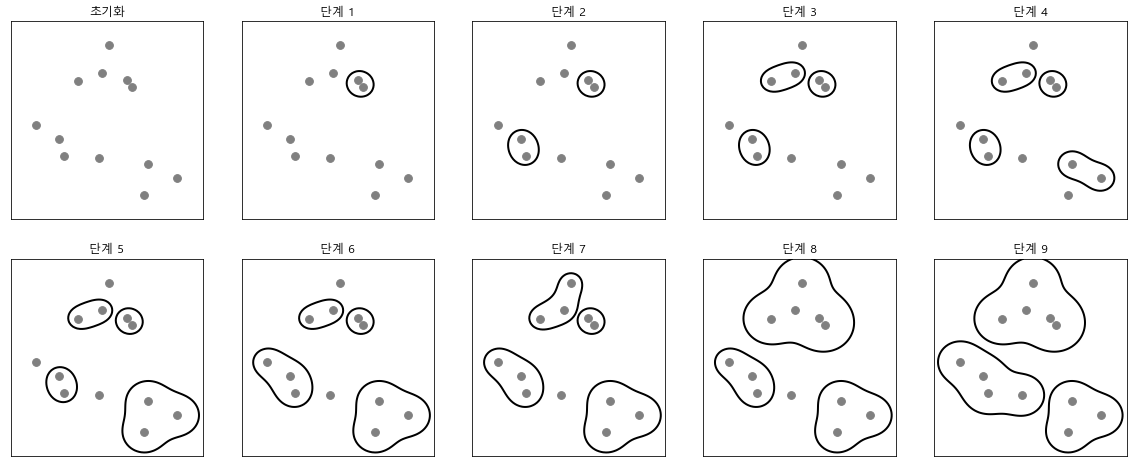

In [4]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

ward : 기본값인 ward 연결은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. 그래서 크기가 비교적 비슷한 클러스터가 만들어진다.
average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.

초기에 각 포인트가 하나의 클러스터이다.
그 다음 각 단계에서 가장 가까운 두 클러스터가 합쳐진다.

알고리즘 작동 특성상 병합 군집은 새로운 데이터 포인트에 대해서는 예측을 할 수 없다.
그러므로 병합 군집은 predict 메서드가 없다.

대신 훈련 세트로 모델을 만들고 클러스터 소속 정보를 얻기 위해서 fit_predict 메서드를 사용한다.

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


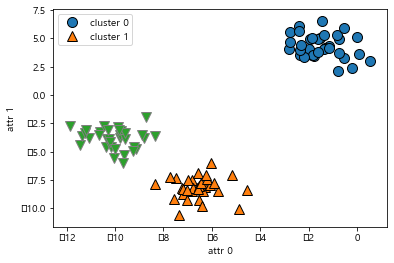

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import mglearn
import matplotlib.pyplot as plt

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["cluster 0", "cluster 1"], loc="best")
plt.xlabel("attr 0")
plt.ylabel("attr 1")
plt.show()

scikit-learn의 병합 군집 모델을 사용하려면 찾을 클러스터의 개수를 지정해야만 하지만, 병합 군집이 적절한 개수를 선택하는데 도움을 주기도 한다.

<계층적 군집과 덴드로그램>

병합 군집은 계층적 군집을 만든다. 
군집이 반복하여 진행되면서 모든 포인트는 하나의 포인트를 가진 클러스터에서 마지막 클러스터까지 이동하게 된다.

아래 그림은 각 클러스터가 더 작은 클러스터로 어떻게 나뉘는지 잘 보여준다.

[병합군집으로 생성한 계층적 군집]

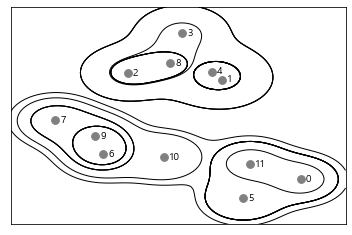

In [6]:
import mglearn
mglearn.plots.plot_agglomerative()

이 그래프는 2차원 데이터 일 때 뿐이며, 특성이 셋 이상인 데이터셋에서는 사용할 수 없다.
하지만 계층 군집을 시각화하는 또 다른 도구인 덴드로그램(dendrogram)은 다타원 데이터셋을 처리할 수 있다.

scikit-learn은 아직 덴드로그램을 그리는 기능은 제공하지 않는다. 
그러나 SciPy를 사용해 손쉽게 만들 수 있다.

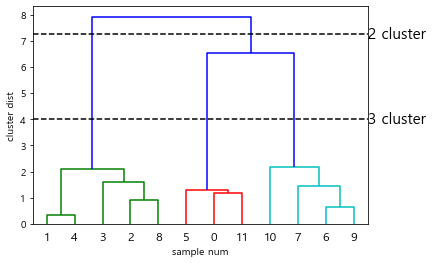

In [7]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=0, n_samples=12)

# 데이터 배열 X에 ward함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환한다.
linkage_array = ward(X)

# 클러스터 간의거리 정보가 담긴 linkage_array를 사용해 덴드로 그램을 그린다.
dendrogram(linkage_array)

# 두개와 세개의 클러스터를 구분하느 커트라인
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, '2 cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '3 cluster', va='center', fontdict={'size':15})
plt.xlabel("sample num")
plt.ylabel("cluster dist")
plt.show()

덴드로그램에서 데이터 포인트는 맨 아래 나타단다.

만들어진 순서대로 보면 1-4가 합쳐지고, 6-9가 합쳐지는 순서이다.

덴드로그램의 y축이 단순히 병합알고리즘에서 두 클러스터가 합쳐질 때를 나타내는 것만은 아니다.
가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 보여준다.

하지만 병합 군집은 two_moons데이터셋과 같은 복잡한 형상을 구분하지 못한다.
=> 다음 에 볼 알고리즘인 DBSCAN은 이러한 문제가 없다.

< DBSCAN >
density-based spatialclustering of applications with noise

DBSCAN은 아주 유용한 군집 알고리즘이다.
주요 장점은 클러스터의 개수를 미리 지정할 필요가 없다.

이 알고리즘은 복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.

병합군집이나 k-평균보다는 다소 느리지만 비교적 큰 데이터셋에도 적용할 수 있다.

DBSCAN은 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾는다.

이런 지역을 특성 공간의 밀집 지역(dense region)이라고 한다.

DBSCAN의 아이디어는 데이터의 밀집 지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것이다.

밀집 지역에 있는 포인트를 핵심 샘플(핵심 포인트)라고 한다.

DBSCAN에는 두 개의 매개변수 min_samples와 eps가 있다.
한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 드렁있으면 이 데이터 포인트를 핵심 샘플로 분류한다.
eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐진다.

이 알고리즘은 시작할 때 무작위로 포인트를 선택한다.

그런다음 그 포인트에서 eps거리안의 모든 포인트를 찾는다.

만약 eps 거리 안에 있는 포인트 수가 min_samples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음(noise)으로 레이블한다.

eps거리 안에 min_samples보다 많은 포인트가 있다면 그 포인트는 핵심 샘플로 레이블하고 새로운 클러스터 레이블을 할당한다.
그런다음 그 포인트의 모든 이웃을 살핀다.

이런식으로 계속 진행하려 글러스터는 eps거리안에 더 이상 핵심 샘플이 없을때까지 자라나며, 
그런다음 아직 방문하지 못한 포인트를 선택하여 같은 과정을 반복한다.

병합 군집에 사용했던 데이터셋에 DBSCAN을 적용해보자.

비지도 학습이르모 DBSCAN은 새로운 테스트 데이터에 대해 예측 할 수 없으므로 fit_predict 메서드를 사용하려 군집과 클러스터 레이블을 한번에 계산한다

https://scikit-learn.org/stable/modules/clustering.html

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블 : \n{}".format(clusters))

클러스터 레이블 : 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


작은 샘플 데이터셋에 적합하지 안흔 eps와 min_samples기본값 때문이다
-1레이블:잡음 포인트를 의미
eps거리안에 있는 포인트 수가 min_samples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음으로 레이블된다

여기서는 모든 포인트에 잡음 포인트를 의미하는 -1레이블이 할당되었다.
이는 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples기본값 때문이다.

min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


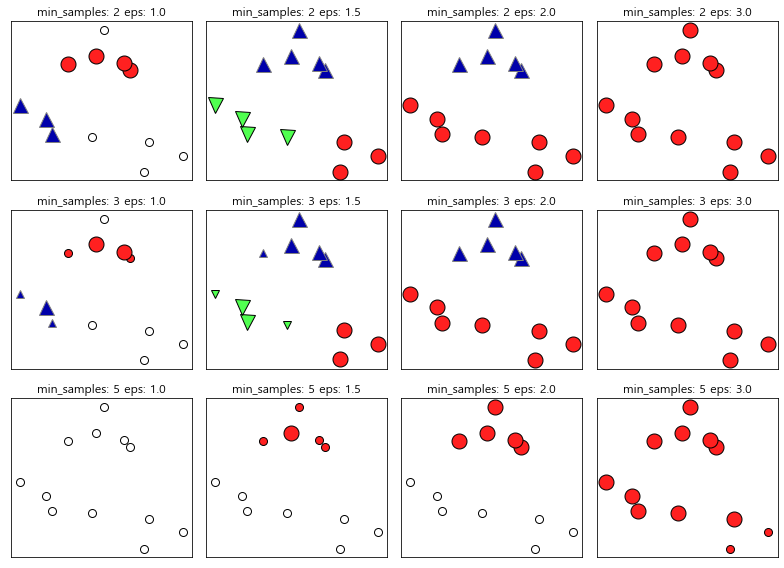

In [10]:
import mglearn
mglearn.plots.plot_dbscan()
# min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
# min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
# min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
# min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
# min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
# min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
# min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
# min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
# min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
# min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
# min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
# min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


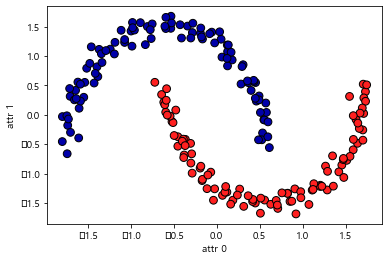

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import mglearn
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("attr 0")
plt.ylabel("attr 1")
plt.show()

### DBSCAN  – iris

In [13]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisdf = pd.DataFrame(data=iris.data, columns=feature_names)
irisdf['target'] = iris.target
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**eps 0.6 min_samples=8 로 DBSCAN 군집화 적용**

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [24]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

###  PCA 2개 컴포넌트 feature들을 차원 축소 후 시각화

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


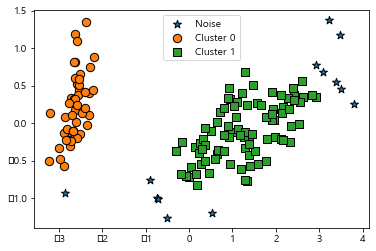

In [25]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisdf['ftr1'] = pca_transformed[:,0]
irisdf['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)

### eps의 크기 증가 후 noise 확인

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


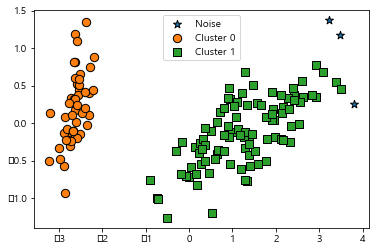

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)

### min_samples의 크기 증가 후 noise 확인

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


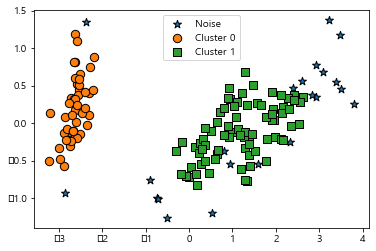

In [27]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)

### DBSCAN – make_circles() 

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


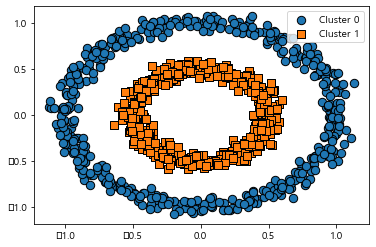

In [28]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterdf = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y

visualize_cluster_plot(None, clusterdf, 'target', iscenter=False)

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


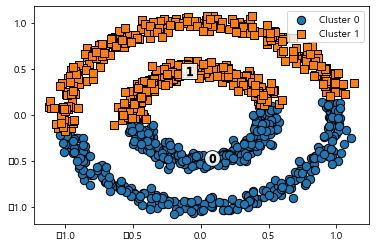

In [29]:
# KMeans 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterdf['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterdf, 'kmeans_cluster', iscenter=True)

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


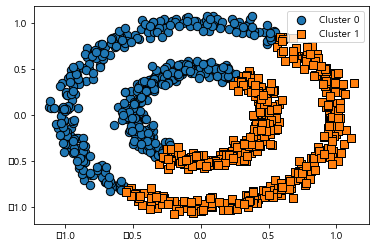

In [30]:
# GMM(Gaussian mixtures)
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterdf['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterdf, 'gmm_cluster', iscenter=False)

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


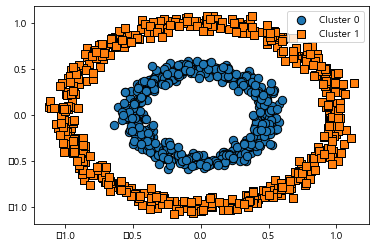

In [31]:
# DBSCAN 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterdf['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterdf, 'dbscan_cluster', iscenter=False)


In [ ]:
< 군집 알고리즘 요약 >
k-평균, DBSCAN, 병합 군집이라는 세가지 군집 알고리즘을 확인해보았다.

세가지 알고리즘 모두 군집을 세밀하게 조절할수있는 방법을 제공한다.

k-평균과 병합 군집은 원하는 클러스터 개수를 지정할 수 있고,
DBSCAN은 eps매개변수를 사용하여 클러스터 크기를 간접적으로 조절할 수 있다.

k-평균은 클러스터 중심을 사용해 클러스터를 구분한다.
이 알고리즘은 각 데이터 포인트를 클러스터 중심으로 대표할 수 있기 때문에 분해 방법으로 볼 수도 있다.

DBSCAN은 클러스터에 할당됮 ㅣ않는 잡음 포인트를 인식할 수 있으며, 클러스터의 개수를 자동으로 결정한다.

병합군집은 전체 데이터의 분할 계층도를 만들어주며 덴드로그램을 사용해 손쉽게 확인할 수 있다.